# IRIS Classification

Nama : M Dicky Alfansyah

Nim  : 183510468

Sumber dataset : https://www.kaggle.com/uciml/iris 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
#meload dataset dari google drive kemudian menampilkannya

url = 'https://drive.google.com/file/d/1YYBS_Q3chTrapBjp-8lQLgfZ80a6APXg/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
data.head() 
data=data.drop('Id',axis=1)
data.head(5) #Set hanya menampilkan 5 data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Model NaiveBaiyes

In [3]:
#Pada dataset terdapat 150 entry (150 rows data), yang terbagi ke dalam 3 kelas.
#Atribut disimpan di elemen “data" yang bertipe numerik.
#Membuat pengambilan keseluruhan data.

X = data.iloc[0:150,[0,1,2,3]].values #perintah mengambil nilai baris 0-150 kemudian mengambil kolom SepalLengthCm - PetalWidthCm
y=data['Species'].values 

#menampilkan data x dan y
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

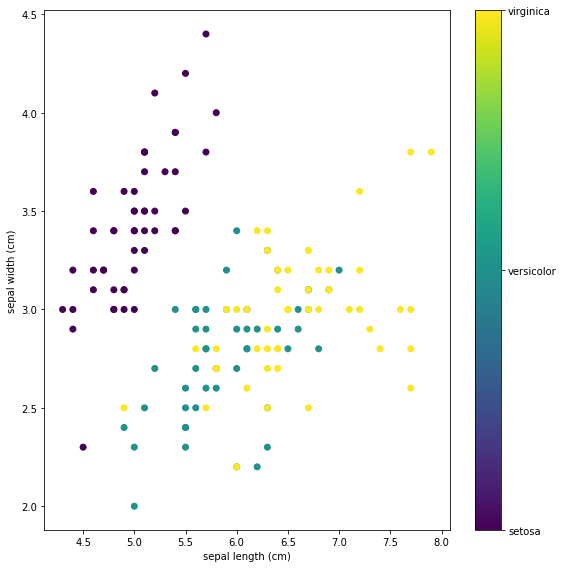

In [4]:
#membuat plot sebar 2D dari dataset iris
from sklearn.datasets import load_iris
iris = load_iris()

# index fitur
x_index = 0
y_index = 1

# memberi format warna sesuai sesuai dengan nama target
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 8))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [5]:
#melakukan pembagian training untuk data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=28)

In [6]:
#melakukan normalisasi
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#melakukan penyesuaian antara klasifikasi dengan data training
naiveClassifier=GaussianNB()
naiveClassifier.fit(X_train,y_train)

#melakukan prediksi hasil klasifikasi dataset  
y_pred = naiveClassifier.predict(X_test)

y_compare = np.vstack((y_test,y_pred)).T #menjaga nilai aktual untuk menentukan hasil dari nilai prediksi
y_compare[:20,:] #menampilkan hasil

array([['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor']], dtype=object)

Text(0, 0.5, 'PREDICTED')

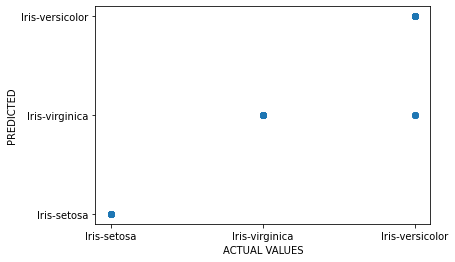

In [8]:
#menampilkan plot sebar 2D dari nilai aktual dan hasil dari prediksi dataset
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED")

In [9]:
#membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 11  4]
 [ 0  0 12]]


In [10]:
#menentukan nilai akurasi confusion matrix.
a = cm.shape
correctPrediction = 0
falsePrediction = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            correctPrediction +=cm[row,c]
        else:
            falsePrediction += cm[row,c]
print('Correct predictions: ', correctPrediction)
print('False predictions', falsePrediction)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', correctPrediction/(cm.sum()))

Correct predictions:  34
False predictions 4


Accuracy of the Naive Bayes Clasification is:  0.8947368421052632


# Model KKN

In [11]:
#melakukan pendeskripsian untuk menghitung dan menampilkan statistik ringkasan dataset
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#melakukan rancangan training sampel dataset
X = np.array(data.iloc[:, 0:4])
y = np.array(data['Species'])
# melakukan pembagian data train dan tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=3)

In [13]:
#melakukan pemodelan pengklasifikasi data untuk menentukan hasil prediksi 
neighRange = range(1,30)
scores = []
for k in neighRange:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    
print(scores) #menampikan data
model.predict([[5.0,3.3,1.4,0.2]])

[0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9555555555555556, 0.9555555555555556, 0.9666666666666667, 0.9666666666666667, 0.9555555555555556, 0.9555555555555556, 0.9666666666666667, 0.9777777777777777, 0.9777777777777777, 0.9666666666666667, 0.9555555555555556, 0.9555555555555556, 0.9444444444444444, 0.9444444444444444, 0.9555555555555556, 0.9444444444444444, 0.9333333333333333, 0.9555555555555556, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9222222222222223, 0.9333333333333333, 0.9111111111111111, 0.8888888888888888, 0.9222222222222223]


array(['Iris-setosa'], dtype=object)

In [14]:
#melakukan record kesalahan klasifikasi
missClass = [1 - x for x in scores]

# menentukan nilai terbaik K
optimal_k = neighRange[missClass.index(min(missClass))]
print("The optimal number of neighbors is %d" % optimal_k) #menampilkan data

The optimal number of neighbors is 11


Text(0, 0.5, 'Testing Accuracy')

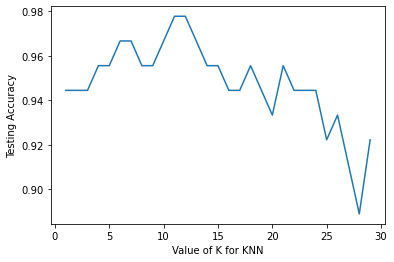

In [15]:
#membuat plot sebar 2D dari value K dengan nilai akurasi testing
plt.plot(neighRange, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Penjelasan Singkat

Dari dataset dengan menggunakan 2 model yang berbeda, model pertama mempelajari pengklasifikasi data dengan memprediksi hasil peluang nilai untuk kedepannya dan untuk model kedua mempelajari pengklasifikasi data berdasarkan artribut dan sample dari data training